### Pricing of Barrier Options

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
rng = np.random.default_rng(1234)

First we define a function to simulate the asset paths using the geometric brownian motion

In [2]:
def simulate_asset_paths(S0, r, sigma, T, N, M):
    dt = T / N
    paths = np.zeros((M, N + 1))
    paths[:,0] =  S0
    for i in range(1, N+1):
        z = rng.normal(0,1, M)
        paths[:, i] = paths[:, i-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * z * np.sqrt(dt))
    return paths

Now we need to compute the payoff of the barrier option

In [3]:
def compute_payoff_barrier(paths, K, barrier, type='call'):
    N = paths.shape[1] -  1
    if type=='call':
        payoff = np.maximum(paths[:, N] - K, 0)
    else:
        payoff = np.maximum(K - paths[:, N] - K, 0)
    barrier_hit = np.any(paths < barrier, axis=1)
    payoff[barrier_hit] = 0
    return payoff

We can also plot the price now

In [4]:
def plot_price_paths(paths):
    plt.plot(paths.T) 
    plt.xlabel('Time Steps') 
    plt.ylabel('Stock Price') 
    plt.title('Simulated Stock Price Paths') 
    plt.show()

Now to the defintion of the barrier option

In [5]:
def price_barrier_option(S0, r, sigma, T, K, barrier, N, M, type='call'):
    paths = simulate_asset_paths(S0, r, sigma, T, N, M)
    payoff = compute_payoff_barrier(paths, K, barrier, type)
    option_price = np.exp(-r * T) * np.mean(payoff)
    return option_price

Now that the setup is comlete we can define the inputs

In [6]:
S0, r, sigma, T, K, barrier, N, M	= 100.0, 0.05 ,0.2, 1.0, 100.0, 80.0, 365, 10000

barrier option price 10.604541729768547


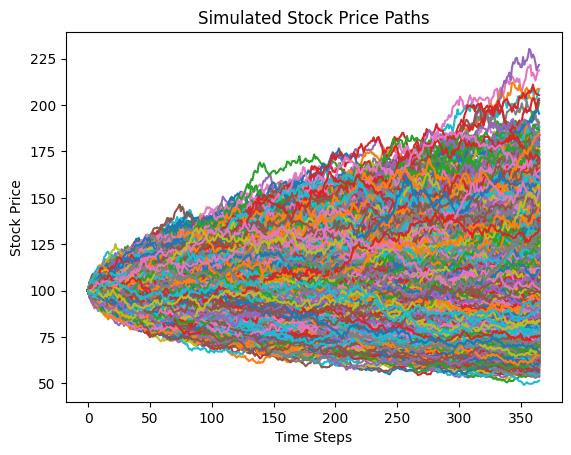

In [7]:
price = price_barrier_option(S0, r, sigma, T, K, barrier, N, M)
print('barrier option price', price)

paths = simulate_asset_paths(S0, r, sigma, T, N, M)
plot_price_paths(paths)
